```
=================================================
Milestone 1

Nama  : Fauzan Rahmat Farghani
Batch : HCK-027

Proyek ini dibuat untuk melakukan praktif analisis statistik deskriptif dan inferensial.
=================================================
```

Judul Milestone: Customer Purchasing Behaviour Analysis

Link Dataset: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data

Link Tableau Dashboard: https://public.tableau.com/app/profile/fauzan.farghani/viz/M1_FauzanFarghani2/Dashboard1?publish=yes

# Latar Belakang

Pemahaman terkait perilaku pelanggan merupakan kunci utama bagi perusahaan-perusahaan sebagai acuan guna untuk mengembangkan potensi bisnis. Kunci utama ini tentunya didasari oleh aktivitas pelanggan. Seperti identitas, segmen, lokasi, informasi produk, dan detail transaksi. Pengembangan potensi bisnis dilakukan dengan tujuan untuk mengidentifikasi pola pembelian, penentuan kategori produk terlaris, evaluasi relasi antara produk dan besaran penjualan, dan pengembangan strategi penjualan agar pemasaran tepat sasaran. Dari tujuan-tujuan yang telah disebutkan sebelumnya, adapun analisis dan dataset yang akan digunakannya nanti berfungsi untuk mengukur pola penjualan selama sepekan kedepan.

# a. Deskripsi Permasalahan

**Problem Statement:**

Perusahaan X mengalami kendala terkait minimnya pemahaman tentang perilaku pembelian pelanggan, dimana minimnya pemahaman tersebut mengakibatkan beberapa aspek seperti strategi pemasaran tidak efisien, Kinerja penjualan yang tidak definitif, dan kurangnya preferensi terkait pengiriman yang berpotensi memengaruhi kepuasan pelanggan. 

**SMART Framework:**

    - Specific: 
    Optimasi Strategi Pemasaran: Mencari tau apakah moda pengiriman memengaruhi tingkat pemesanan dari pelanggan.
    Identifikasi Daerah Penjualan Potensial: Identifikasi penjualan dengan performa tinggi.

	    Metrik: Pelanggan, Produk, dan waktu

    - Measureable:
    Meningkatkan Penjualan sebanyak 20% berdasarkan sebaran daerah dengan transaksi penjualan terbesar
    Efisiensi waktu pengiriman barang sebanyak 10%

    - Achievable:
    Analysis Dataset terkait transaksi pembelian retail
    Analysis Extreme Data Analysis terkait dataset
    Penerapan Pengolahan Data pada dataset
    Visualisasi Hasil Analisa data

    - Relevant: 
    Upaya Peningkatan Penjualan dan efisiensi waktu pengiriman berpotensi dapat meningkatkan kepuasan pelanggan dan memengaruhi perilaku pelanggan dalam berminat untuk meningkatkan transaksi yang berdampak pada meningkatnya penjualan secara keseluruhan.

    - Time-Bound: Proses Pengerjaan proyek analisis dilakukan selama 5 hari meliputi:
    EDA, data cleaning
    Analisis produk, tren dan pengiriman
    Rekomendasi Strategi, dokumentasi laporan
    Visualisasi analisa data

**5W + 1H:**

1. Apakah ada perbedaan yang signifikan dalam penjualan dan kategori produk yang berbeda?
2. Mengapa analisis perilaku pelanggan menjadi kunci dalam peningkatan penjualan dan loyalitas?
3. Siapa saja (segmentasi pelanggan) yang berpotensi terkena dampak negatif dari perubahan perilaku pelanggan?
4. Apa indikator dari permasalahan yang muncul dari faktor perilaku pelanggan?
5. Divisi mana saja yang berpotensi terkena dampak penurunan penjualan akibat perilaku pelanggan?
6. Bagaimana penyebaran pola perilaku pelanggan terbentuk?


# b. Loading Data

Akses file CSV dataset menggunakan pandas

In [1]:
import pandas as pd
import plotly.express as px
from scipy import stats

In [2]:
# Tampilkan data dari file CSV
df = pd.read_csv('train 2.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


Head dari dataset:

In [3]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


Tampilkan list kolom di dataset:

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Cek Summary Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Dari preview summary data kotor, terdapat 11 null value pada kolom postal code, sehingga perlu ada sedikit pembersihan data pada kolom tersebut. Ditambah dengan format tipe data yang tidak sesuai pada kolom order date dan ship date dimana tipe datanya masih berupa objek.

# c. Pembersihan Data

Dalam proses pembersihan data, kegiatan yang terlibat adalah pengisian value untuk kode pos, pengubahan tipe data tanggal menggunakan format datetime, pembulatan angka penjualan, dan striping nama produk.

In [6]:
#Isi missing values dari kode pos
df['Postal Code'] = df['Postal Code'].astype(str).str.zfill(5)

#Konversi tipe data ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

#pembulatan 2 angka di belakang koma
df['Sales'] = df['Sales'].round(2)

#Strip whitespace from 'Product Name' column
df['Product Name'] = df['Product Name'].str.strip()

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.80
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.37
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.19
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.38


Periksa ulang missing values di dataset setelah dibersihkan:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Dari hasil summary data diatas, data sudah terbebas dari missing value karena jumlah non-null valuenya sudah sesuai dengan total baris yakni 9800 dan penyesuaian Dtype sudah direvisi. Adapun data sudah dibersihkan, maka akan lanjut ke proses analisa.

Simpan dataset yang telah dibersihkan ke CSV baru:

In [8]:
#save to csv
df.to_csv('cleaned_dataset.csv', index=False)

# d. Analysis dan Eksplorasi

### Distribusi Statistika:

In [9]:
print(df['Sales'].describe())
#satuan value dari sales adalah $

count     9800.000000
mean       230.769036
std        626.651878
min          0.440000
25%         17.250000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


Dari hasil describe untuk memaparkan hasil statistika, adapun hasil distribusi penjualan yang didapatkan adalah sebagai berikut:

Rata-rata Penjualan: $230.77

Count: 9,800 input data

Standar Deviasi: $626.65

Penjualan Minimum: $0.44

Q1: $17.25

Median (Q2): $54.49

Q3: $210.61

Penjualan Maksimum: $22,638.48



### 1. Apakah ada perbedaan yang signifikan dalam penjualan dan kategori produk yang berbeda?

Variabel untuk mengkategorikan penjualan:

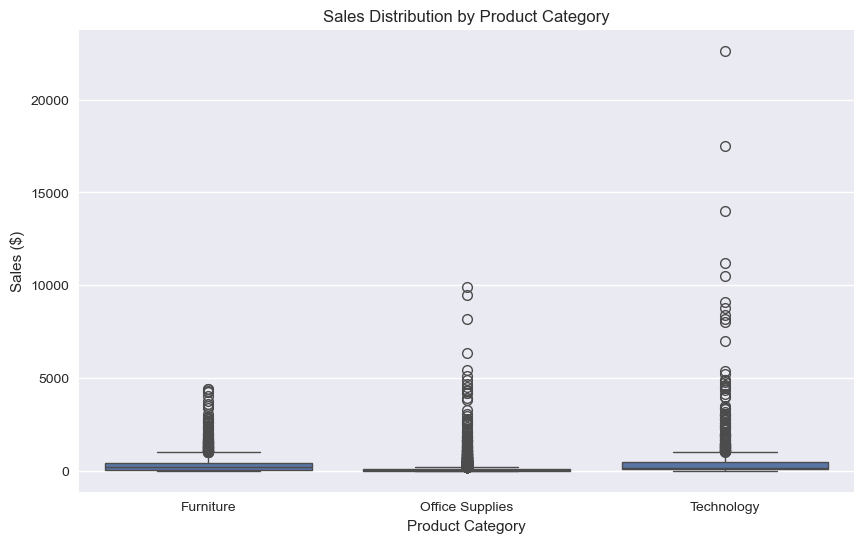

/var/folders/47/0h1065tj6rqd_vly1hg1tym80000gn/T/ipykernel_2006/2021726359.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator='mean', ci=None)


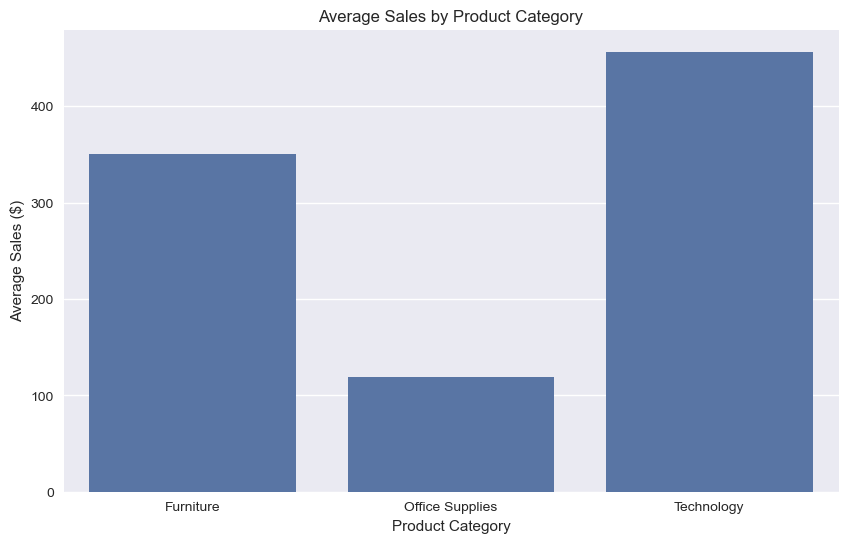

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8')

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales ($)')
plt.show()

# Bar chart for mean sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator='mean', ci=None)
plt.title('Average Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales ($)')
plt.show()

In [15]:
# Group sales by category
furniture_sales = df[df['Category'] == 'Furniture']['Sales']
office_sales = df[df['Category'] == 'Office Supplies']['Sales']
tech_sales = df[df['Category'] == 'Technology']['Sales']

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(furniture_sales, office_sales, tech_sales)

# Print results
print(f'ANOVA Test Results:')
print(f'F-statistic: {f_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sales across product categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales across product categories.")

ANOVA Test Results:
F-statistic: 262.16
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sales across product categories.


In [ ]:
categories = df['Category'].unique()
sales_by_category = [df[df['Category'] == cat]['Sales'] for cat in categories]

In [ ]:
# One-Way ANOVA
f_stat, p_val = stats.f_oneway(*sales_by_category)
print(f"\nOne-Way ANOVA:")
print(f"F-statistic = {f_stat:}, p-value = {p_val:}")
if p_val > 0.05:
    print("Tidak ada perbedaan signifikan antara kategori")
else:
    print("Ada perbedaan signifikan antara masing-masing kategori")


One-Way ANOVA:
F-statistic = 262.1646673068236, p-value = 1.217805034895499e-111
Ada perbedaan signifikan antara masing-masing kategori


Dari hasil uji ANOVA pada hasil penjualan dan semua kategori produk, hasil menunjukkan bahwa terdapat perbedaan signifikan antara total penjualan dari masing-masing kategori produk.

### 2. Mengapa analisis perilaku pelanggan menjadi kunci dalam peningkatan penjualan dan loyalitas?

In [ ]:
#Nilai Value Pelanggan
customer_value = df.groupby('Customer ID')['Sales'].sum().reset_index()
fig3 = px.histogram(customer_value, x='Sales', nbins=20,
                   title='Customer Lifetime Value',
                   labels={'Sales': 'Total Sales per Customer'})
fig3.update_layout(bargap=0.1)

Dari diagram batang diatas, dapat dilihat bahwa kontribusi pemasukkan dari transaksi pelanggan terbanyak ada di rentang 1000-2999. hal ini menandakan masih sebagian besar pelanggan belum berkontribusi secara besar terhadap pemasukkan dikarenakan transaksi penjualan yang minim. Oleh karena itu, pentingnya analisis perilaku pengguna guna untuk mengurangi skewness pada diagram adalah bertujuan untuk meningkatkan kontribusi transaksi penjualan yang lebih banyak sehingga kontribusi dari transaksi untuk pemasukkan bisa menjadi lebih besar.  

### 3. Siapa saja (segmentasi pelanggan) yang berpotensi terkena dampak negatif dari perubahan perilaku pelanggan?

In [ ]:
# Menghitung total penjualan per segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

#Visualisasi
fig5 = px.bar(
    sales_by_segment,
    x='Segment',
    y='Sales',
    title='Total Penjualan per Segmentasi Pelanggan',
    labels={'Sales': 'Total Penjualan', 'Segment': 'Segmentasi'},
    color='Segment',
    text='Sales'
)

#Atur sumbu x dan y serta label
fig5.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig5.update_layout(
    yaxis_title='Total Penjualan ($)',
    xaxis_title='Segmentasi Pelanggan',
    hovermode='x'
)

fig5.show()

Berdasarkan hasil visualisasi dari diagram diatas, segmen home office berpotensi besar terkena dampak negatif dari perubahan perilaku pelanggan karena memiliki total penjualan rendah.

### 4. Apa indikator dari permasalahan yang muncul dari faktor perilaku pelanggan?

In [ ]:
df['Order Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_orders = df.groupby('Order Month')['Order ID'].nunique().reset_index()
fig6 = px.line(monthly_orders, x='Order Month', y='Order ID',
              title='Tren Pesanan Bulanan',
              labels={'Order ID': 'Number of Orders', 'Order Month': 'Month'})
fig6.show()


Berikut adalah line chart untuk order bulanan. Dari visualisasi diatas, kenaikan garis menandakan bahwa pemesanan sedang tinggi di bulan tersebut, begitupun sebaliknya jika garis turun maka menandakan kalau tren pesanan ikut turun. Selain itu, fluktuasi pada chart dapat memaparkan periode ketidakstabilan permintaan barang.

In [ ]:
ship_mode = df.groupby('Ship Mode')['Sales'].agg(['sum', 'count']).reset_index()
fig7 = px.bar(ship_mode, x='Ship Mode', y='sum',
             title='Total Penjualan Berdasarkan Mode Pengiriman',
             labels={'sum': 'Total Sales ($)'})
fig7.show()

Insight yang dapat diambil dari grafik diatas adalah mode pengiriman yang paling sering digunakan adalah standard class. Hal ini bisa terjadi karena standard class merupakan tipe pengiriman reguler dengan harga yang jauh lebih terjangkau dari tipe pengiriman class lainnya. 

### 5. Divisi mana saja yang berpotensi terkena dampak penurunan penjualan akibat perilaku pelanggan?

In [ ]:
subcat_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
fig8 = px.treemap(subcat_sales, path=['Category', 'Sub-Category'], values='Sales',
                 title='Rincian Penjualan berdasarkan Category dan Sub-Category')

fig8.show()

Insight yang dapat diambil dari treemap diatas adalah antara lain kategori yang memiliki performa produk bagus. Contohnya dapat dilihat di treemap bagian kategori elektronik dan furniture dimana kursi dan handphone mempunyai angka perjualan terbesar.

### 6. Bagaimana penyebaran pola perilaku pelanggan terbentuk?

In [ ]:
# RFM Analysis
current_date = df['Order Date'].max() + pd.Timedelta(days=1)   
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

fig9 = px.scatter(rfm, x='Recency', y='Frequency', size='Monetary',
                 color='Monetary', title='Customer Purchasing Behavior',
                 labels={
                     'Recency': 'Days Since Last Purchase',
                     'Frequency': 'Number of Purchases',
                     'Monetary': 'Total Spending ($)'
                 })

fig9.show()

Dari scatter diagram diatas dapat disimpulkan bahwa perilaku pelanggan untuk melakukan transaksi kembali dapat terlihat mulai dari 0 hingga 200 hari terakhir transaksi sebelumnya dilakukan. Selain itu, jika kita mengtooltip lingkaran-lingkaran di sebarannya, pelanggan dengan nilai spending besar juga bisa disimpulkan berkontribusi secara signifikan terhadap pemasukkan.

# Kesimpulan

Analisis yang dilakukan dalam notebook ini memberikan wawasan tentang perilaku pembelian pelanggan dan kinerja penjualan. Poin-poin utama meliputi yang didefinisikan meliputi analisis perilaku pelanggan untuk mengidentifikasi pelanggan yang bertransaksi dengan nominal tinggi dan memberikan kontribusi besar terdahap pendapatan toko, ditambah dengan pelanggan dengan transaksi yang masih minim masih perlu dievaluasi kembali untuk meningkatkan transaksi. Selain itu, Performa penjualan juga didominasi oleh kategori produk elektronik dan furnitur dengan masing-masing barang tertingginya adalah handphone dan kursi. Tren penjualan bulanan juga mengindikasikan adanya pola musiman yang dimana jumlah pesanan bisa meningkat atau menurun. Selain tren penjualan dan perilaku pelanggan, ada juga faktor moda pengiriman dengan biaya terjangkau sehingga dijadikan sebagai pilihan favorit pelanggan untuk pilihan ekspedisi pengiriman barang ke alamat pelanggan masing-masing. 

# Rekomendasi

- Implementasi loyalty program atau promo khusus untuk para pelanggan dengan jumlah transaksi yang besar guna untuk meningkatkan transaksi berulang.

- Adakan kampanye marketing terarah untuk meningkatkan kasta pelanggan dengan transaksi kecil menjadi sedang atau besar.

- Fokus pada segmen dengan penjualan tinggi (misalnya Corporate) untuk mempertahankan loyalitas.

- Buat strategi retensi untuk segmen dengan penjualan rendah (misalnya Home Office) jika terdeteksi penurunan.

- Lakukan analisa untuk mencari tau mengapa beberapa sub-kategori memiliki nilai penjualan yang rendah dan buatkan strategi untuk meningkat penjualannya.

- Mempertahankan loyalitas pada moda pengiriman regular dengan meningkatkan promosi pengiriman seperti diskon pengiriman atau gratis ongkos kirim.